In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
import tensorflow as tf
from numpy import unique
from numpy import reshape
from keras.models import Sequential
from keras.layers import Conv1D, Conv2D, Dense, BatchNormalization, Flatten, MaxPooling2D, Activation
from keras.layers import Dense, Dropout
from keras import utils
from keras.datasets import mnist
from numpy import argmax
from PIL import Image
from numpy import asarray

In [3]:
tf.random.set_seed(42)

In [4]:
hand = mnist.load_data()

In [5]:
hand[0]

(array([[[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        ...,
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],

In [6]:
(X_train, y_train), (X_test, y_test) = hand

In [7]:
np.set_printoptions(edgeitems=3)
np.core.arrayprint._line_width = 180000

In [8]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [9]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [10]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

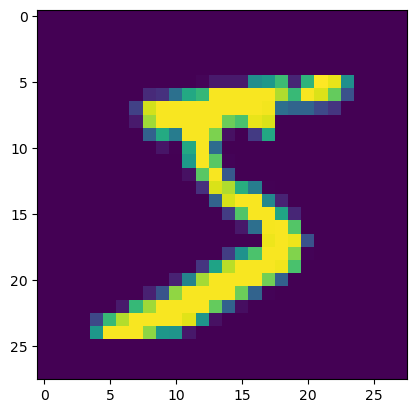

In [11]:
plt.imshow(X_train[0])

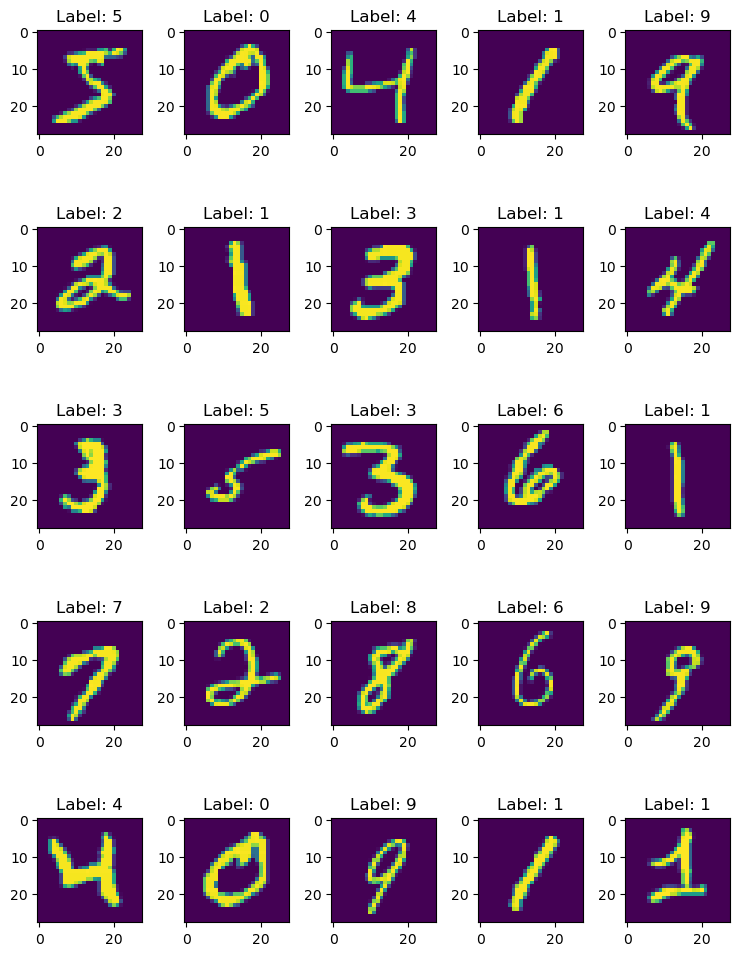

In [12]:
num = 25
images = X_train[:num]
labels = y_train[:num]

num_row = 5
num_col = 5
# plot images
fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for i in range(num):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(images[i])#, cmap='gray')
    ax.set_title('Label: {}'.format(labels[i]))
plt.tight_layout()
plt.show()

In [13]:
# 5. Preprocess input data
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [14]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [15]:
X_train /= 255
X_test /= 255

In [17]:
# 6. Preprocess class labels
Y_train = utils.to_categorical(y_train, 10)
Y_test = utils.to_categorical(y_test, 10)

In [18]:
Y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [19]:
for label in range(10):
    one_hot = (Y_train[label]).astype(np.int32)
    print("label: ", label, " in one-hot representation: ", one_hot)

label:  0  in one-hot representation:  [0 0 0 0 0 1 0 0 0 0]
label:  1  in one-hot representation:  [1 0 0 0 0 0 0 0 0 0]
label:  2  in one-hot representation:  [0 0 0 0 1 0 0 0 0 0]
label:  3  in one-hot representation:  [0 1 0 0 0 0 0 0 0 0]
label:  4  in one-hot representation:  [0 0 0 0 0 0 0 0 0 1]
label:  5  in one-hot representation:  [0 0 1 0 0 0 0 0 0 0]
label:  6  in one-hot representation:  [0 1 0 0 0 0 0 0 0 0]
label:  7  in one-hot representation:  [0 0 0 1 0 0 0 0 0 0]
label:  8  in one-hot representation:  [0 1 0 0 0 0 0 0 0 0]
label:  9  in one-hot representation:  [0 0 0 0 1 0 0 0 0 0]


In [20]:
epochs = 30
batch_size = 16
n_hidden = 32

#timesteps = len(X_train[0])
#input_dim = len(X_train[0][0])
#n_classes = _count_classes(Y_train)

# 7. Define model architecture
model = Sequential()
 
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
 
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
 
# 8. Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

C:\Users\Samth\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [21]:
# 9. Fit model on training data
model.fit(X_train, Y_train, batch_size=32, epochs=10, verbose=1)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 61s 30ms/step - accuracy: 0.8692 - loss: 0.4175
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 54s 29ms/step - accuracy: 0.9721 - loss: 0.0949
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 53s 28ms/step - accuracy: 0.9792 - loss: 0.0692
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 54s 29ms/step - accuracy: 0.9826 - loss: 0.0587
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 54s 29ms/step - accuracy: 0.9853 - loss: 0.0492
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 55s 29ms/step - accuracy: 0.9862 - loss: 0.0447
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 54s 29ms/step - accuracy: 0.9886 - loss: 0.0374
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 53s 28ms/step - accuracy: 0.9884 - loss: 0.0359
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 53s 28ms/step - accuracy: 0.9900 - loss: 0.0322
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 54s 29ms/step - accuracy: 0.9904 - loss: 0.0303


In [22]:
# 10. Evaluate model on test data
score = model.evaluate(X_test, Y_test, verbose=2)

313/313 - 4s - 13ms/step - accuracy: 0.9918 - loss: 0.0342


In [23]:
#predict first 4 images in the test set
model.predict(X_test[:4])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 301ms/step


array([[7.10064146e-17, 6.17667072e-12, 7.40574529e-12, 1.25099115e-11,
        5.59291408e-15, 5.48442081e-16, 3.91873313e-23, 1.00000000e+00,
        2.55699172e-15, 4.65572442e-11],
       [2.28429590e-14, 1.43755230e-07, 9.99999881e-01, 1.88940857e-17,
        4.58425514e-17, 1.99191463e-19, 1.58892783e-13, 5.26797881e-17,
        1.14807190e-16, 1.03219749e-20],
       [2.91854985e-15, 1.00000000e+00, 8.72926870e-11, 8.23957195e-14,
        5.41216671e-09, 4.06050089e-11, 5.37515622e-11, 1.38171241e-09,
        1.66006001e-10, 4.78597977e-12],
       [9.99999523e-01, 2.27478865e-12, 1.71043490e-09, 8.60553274e-13,
        1.29092292e-11, 2.77123463e-10, 5.30866259e-07, 2.39498308e-12,
        1.82764897e-08, 1.30610198e-08]], dtype=float32)

In [24]:
sumarray = np.sum(model.predict(X_test[:4]), axis=1)
sumarray

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


array([1., 1., 1., 1.], dtype=float32)

In [25]:
#actual results for first 4 images in test set
y_test[:4]

array([7, 2, 1, 0], dtype=uint8)

In [26]:
test_predictions = model.predict(X_test)
cm = confusion_matrix(y_test, np.argmax(test_predictions,axis=1))
print(cm)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step
[[ 977    0    0    0    0    0    1    0    1    1]
 [   0 1134    0    0    0    1    0    0    0    0]
 [   1    0 1029    0    0    0    0    2    0    0]
 [   0    0    2 1005    0    2    0    0    1    0]
 [   0    0    0    0  977    0    1    0    1    3]
 [   0    0    1    5    0  885    1    0    0    0]
 [   3    3    0    0    1    5  945    0    1    0]
 [   0    1    5    1    0    0    0 1020    1    0]
 [   2    1    5    1    1    1    0    2  960    1]
 [   1    1    1    3    5    7    0    3    2  986]]


In [36]:
path= r'C:\Users\Samth\CareerFoundry Projects\Other\Numbers'
path

'C:\\Users\\Samth\\CareerFoundry Projects\\Other\\Numbers'

In [55]:
img = Image.open(os.path.join(path, '7g.jpg'))
print(img.format)
print(img.size)
print(img.mode)

JPEG
(921, 614)
L


In [56]:
newsize = (28,28)
img2 = img.resize(newsize)
img2

In [57]:
testimg = asarray(img2)

In [58]:
print(testimg.shape)

(28, 28)


In [59]:
testimg = testimg.reshape(1, 28, 28, 1)

In [60]:
# predict the class
predict_value = model.predict(testimg)
digit = argmax(predict_value)
print(digit)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
5


In [63]:
img3 = Image.open(os.path.join(path, '0g.jpg'))
print(img3.format)
print(img3.size)
print(img3.mode)

newsize = (28,28)
img4 = img3.resize(newsize)
img4

testimg1 = asarray(img4)

print(testimg1.shape)

testimg1 = testimg1.reshape(1, 28, 28, 1)

JPEG
(921, 614)
L
(28, 28)


In [64]:
predict_value1 = model.predict(testimg1)
digit1 = argmax(predict_value1)
print(digit1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
5


In [65]:
img5 = Image.open(os.path.join(path, '4g.jpg'))
print(img5.format)
print(img5.size)
print(img5.mode)

newsize = (28,28)
img6 = img5.resize(newsize)
img6

testimg2 = asarray(img6)

print(testimg2.shape)

testimg2 = testimg2.reshape(1, 28, 28, 1)

JPEG
(921, 614)
L
(28, 28)


In [66]:
predict_value2 = model.predict(testimg2)
digit2 = argmax(predict_value2)
print(digit2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
5
